In [56]:
import numpy as np
from matplotlib import pyplot as plt

## K Means Algorithm - Elliot Linsey

In [57]:
data = np.array([23,34,43,26,41,78,86,68,97,76,150,135,160,125,144])

A small test harness for a couple of methods I plan to use. 

In [58]:
def test(data=[23,34,43,26,41]):
    assert(sum(data)/len(data) == 33.4)
    #centroid = 34
    dist1 = [abs(34-23), abs(34-34), abs(34-43), abs(34-26), abs(34-41)]
    dist2 = ([abs(x-34) for x in data])
    assert(dist1 == dist2)
test()

Here is a revision of the simple k-means algorithm, this one accepts an integer (k) and will create k number of clusters. Below it randomly chooses the initial cluster centres and appends them to a list which it returns.  

In [59]:
def ini_centroids(data, k):
    lst = []
    choices = np.random.choice(data, size=k, replace=False)
    for i in range(len(choices)):
        lst.append([choices[i]])
    return [i[0] for i in lst]

Below is the clustering function. It first creates a list, then appends each centroid value to a nested list within the clusters list. These nested lists are where the other cluster values will be appended to. From here, the function goes through each datapoint in data and calculates the absolute differences between the datapoint and each separate centroid. It appends these distances to a list (distances), it then finds the index of the minimum value within distances, this being the corresponding cluster that the datapoint is closest to. As both lists distances and clusters have the same length, we can then append the datapoint to the corresponding cluster. So if distances[2] had the minimum value, we would append the datapoint to cluster_vals[2].\
Due to the fact that it is going over every datapoint again, including the initial randomly selected centroids, each cluster will inevitably append a duplicate of its initial centroid to itself. To correct this, we search through the clusters and remove one instance of the initial centroid from each corresponding cluster.

In [60]:
def clusters(centroids):
    cluster_vals = []
    
    for i in range(len(centroids)):
        cluster_vals.append([centroids[i]])
    #print(cluster_vals)
    for y in data:
        distances = []
        for i in range(len(cluster_vals)):
            
            distances.append(abs(y - cluster_vals[i][0]))
            
        #print(distances)
        idx = distances.index(min(distances))
        cluster_vals[idx].append(y)
    
    for x in cluster_vals:
        #print(x)
        for y in centroids:
            if y in x:
                x.remove(y)
    
        
            
    return cluster_vals

In [61]:
centroids = ini_centroids(data, 3)
print(centroids)

[76, 34, 160]


In [62]:
cluster_values = clusters(centroids)
print(cluster_values)

[[78, 86, 68, 97, 76], [23, 34, 43, 26, 41], [150, 135, 160, 125, 144]]


This is the update function that updates the centroids using the calculated means. It loops through the completed clusters that are fed to it and returns a list of the means from each cluster.

In [63]:
def update(clust_vals):
    cluster_means = []
    for x in clust_vals:
        cluster_means.append(np.mean(x))
    print('means = ' + str(cluster_means))
    return clusters(cluster_means)
    

updates1 = update(cluster_values)

means = [81.0, 33.4, 142.8]


This is the full function, it takes a data array and k number as parameters which can be adjusted. It first initialises the centroids then creates initial clusters based on them. From here it updates the first cluster_values to generate a mean and feeds these back as new centroids into the clusters function. It then repeats this process 9 times, each time feeding the updated data back to itself to generate closer clusters and more stable means. By the end of this process the means have usually stabilised and the clustering process is complete. However, due to the random nature of choosing the initial centroids the whole process can be repeated again until the optimum means and clusters have been achieved. 

In [64]:
def k_means(data,k):
    centroids = ini_centroids(data, k)
    cluster_values = clusters(centroids)
    updates = update(cluster_values)
    for i in range(9):
        print(updates)
        updates = update(updates)
    return updates
#print(k_means(data,3))

In [65]:
k_mean = k_means(data,3)
k_mean

means = [81.0, 142.8, 33.4]
[[78, 86, 68, 97, 76], [150, 135, 160, 125, 144], [23, 34, 43, 26, 41]]
means = [81.0, 142.8, 33.4]
[[78, 86, 68, 97, 76], [150, 135, 160, 125, 144], [23, 34, 43, 26, 41]]
means = [81.0, 142.8, 33.4]
[[78, 86, 68, 97, 76], [150, 135, 160, 125, 144], [23, 34, 43, 26, 41]]
means = [81.0, 142.8, 33.4]
[[78, 86, 68, 97, 76], [150, 135, 160, 125, 144], [23, 34, 43, 26, 41]]
means = [81.0, 142.8, 33.4]
[[78, 86, 68, 97, 76], [150, 135, 160, 125, 144], [23, 34, 43, 26, 41]]
means = [81.0, 142.8, 33.4]
[[78, 86, 68, 97, 76], [150, 135, 160, 125, 144], [23, 34, 43, 26, 41]]
means = [81.0, 142.8, 33.4]
[[78, 86, 68, 97, 76], [150, 135, 160, 125, 144], [23, 34, 43, 26, 41]]
means = [81.0, 142.8, 33.4]
[[78, 86, 68, 97, 76], [150, 135, 160, 125, 144], [23, 34, 43, 26, 41]]
means = [81.0, 142.8, 33.4]
[[78, 86, 68, 97, 76], [150, 135, 160, 125, 144], [23, 34, 43, 26, 41]]
means = [81.0, 142.8, 33.4]


[[78, 86, 68, 97, 76], [150, 135, 160, 125, 144], [23, 34, 43, 26, 41]]

Below I add a visualisation element to my algorithm. It goes through each list from the k_mean function and plots them all separately so they are different colours. [0]\*len(k_mean[i]) is used to create corresponding y values of 0 so that all points stay 1 dimensional. The means of each cluster are then plotted onto the same plot. The colours appear to be random and I haven't figured out how to make them consistent over variable k numbers, however the contrast can actually make it a little easier to see exactly where the means within the clusters are. 

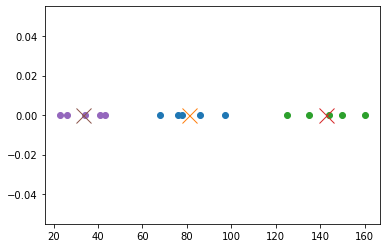

In [66]:
for i in range(len(k_mean)):
    plt.plot(k_mean[i], [0]*len(k_mean[i]), 'o')
    plt.plot(np.mean(k_mean[i]), [0],'x', markersize=15)
    


Below I've put all the functions into a class.

means = [151.33333333333334, 39.166666666666664, 99.5]
means = [147.25, 39.166666666666664, 92.4]
means = [147.25, 39.166666666666664, 92.4]
[[150, 135, 160, 125, 144], [23, 34, 43, 26, 41], [78, 86, 68, 97, 76]]
means = [142.8, 33.4, 81.0]
It took 1 cycles!


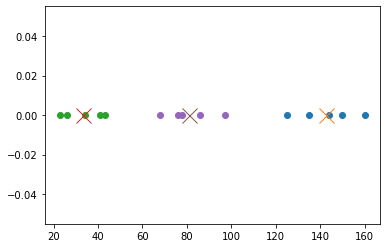

In [67]:
class k_means():
    def __init__(self, data, k):
        self.data = data
        self.k = k
    def ini_centroids(self, data, k):
        lst = []
        choices = np.random.choice(self.data, size=self.k, replace=False)
        for i in range(len(choices)):
            lst.append([choices[i]])
        return [i[0] for i in lst]
    def clusters(self, centroids):
        cluster_vals = []
        for i in range(len(centroids)):
            cluster_vals.append([centroids[i]])
        #print(cluster_vals)
        for y in self.data:
            distances = []
            for i in range(len(cluster_vals)):
                distances.append(abs(y - cluster_vals[i][0]))
            #print(distances)
            idx = distances.index(min(distances))
            cluster_vals[idx].append(y)
        for x in cluster_vals:
            #print(x)
            for y in centroids:
                if y in x:
                    x.remove(y)
        return cluster_vals
    def update(self,clust_vals):
        cluster_means = []
        for x in clust_vals:
            cluster_means.append(np.mean(x))
        print('means = ' + str(cluster_means))
        return self.clusters(cluster_means)
    def k_means_func(self):
        centroids = ini_centroids(self.data, self.k)
        cluster_values = self.clusters(centroids)
        updates = self.update(cluster_values)
        count = 0
        while updates != self.update(updates):
            count += 1
            updates = self.update(updates)
            print(updates)
        print('It took ' + str(count) + ' cycles!')
        return updates
    def plot(self):
        k_mean = self.k_means_func()
        for i in range(len(k_mean)):
            plt.plot(k_mean[i], [0]*len(k_mean[i]), 'o')
            plt.plot(np.mean(k_mean[i]), [0],'x', markersize=15)
    
        
test = k_means(np.array([23,34,43,26,41,78,86,68,97,76,150,135,160,125,144]), 3)    
test.plot()

Here is the function being used with different k numbers.

means = [43.0, 111.9, 24.5, 37.5]
means = [57.0, 121.875, 24.5, 34.0]
means = [57.0, 121.875, 24.5, 34.0]
[[78, 86, 68, 76], [97, 150, 135, 160, 125, 144], [23, 26], [34, 43, 41]]
means = [77.0, 135.16666666666666, 24.5, 39.333333333333336]
means = [77.0, 135.16666666666666, 24.5, 39.333333333333336]
[[78, 86, 68, 97, 76], [150, 135, 160, 125, 144], [23, 26], [34, 43, 41]]
means = [81.0, 142.8, 24.5, 39.333333333333336]
It took 2 cycles!


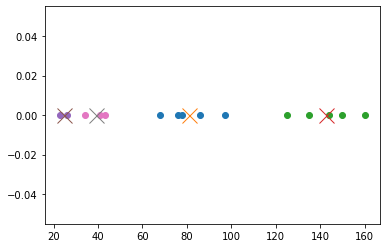

In [68]:
test2= k_means(data,4)
test2.plot()

means = [78.0, 91.5, 76.0, 142.8, 39.166666666666664]
means = [78.0, 91.5, 72.0, 142.8, 33.4]
means = [78.0, 91.5, 72.0, 142.8, 33.4]
[[78, 76], [86, 97], [68], [150, 135, 160, 125, 144], [23, 34, 43, 26, 41]]
means = [77.0, 91.5, 68.0, 142.8, 33.4]
It took 1 cycles!


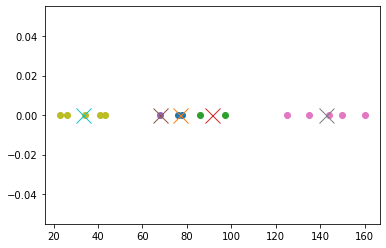

In [69]:
test3 = k_means(data, 5)
test3.plot()

means = [39.166666666666664, 116.77777777777777]
means = [44.42857142857143, 121.875]
means = [44.42857142857143, 121.875]
[[23, 34, 43, 26, 41, 78, 68, 76], [86, 97, 150, 135, 160, 125, 144]]
means = [48.625, 128.14285714285714]
means = [48.625, 128.14285714285714]
[[23, 34, 43, 26, 41, 78, 86, 68, 76], [97, 150, 135, 160, 125, 144]]
means = [52.77777777777778, 135.16666666666666]
It took 2 cycles!


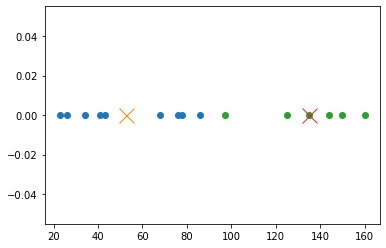

In [70]:
test4 = k_means(data, 2)
test4.plot()

Thanks for reading!\
Elliot Linsey QMUL

In [71]:
a = np.array([1,0])
b = np.array([0,2])

print(np.linalg.norm(a-b))

2.23606797749979


In [72]:
def ini_centroids(data, k):
        lst = []
        data_len = len(data)
        choices = np.random.choice(range(data_len), size=k, replace=False)
        for i in choices:
            lst.append([data[i]])
        return [i[0] for i in lst]

    
#print(ini_centroids(data=(np.array([1,5]), np.array([3,6]), np.array([2,5])),k=2))
ini_centroids = ini_centroids(data=(np.array([1,5]), np.array([3,6]), np.array([4,2]), np.array([3,7]), np.array([5,8]),
                                    np.array([25,31]), np.array([27,33]), np.array([23,25]), np.array([31,28]), np.array([33,31]),
                                    np.array([55,54]), np.array([59,51]), np.array([63,65]), np.array([56,62]), np.array([61,61]),),k=2)
print(ini_centroids)
def clusters(centroids):
        cluster_vals = []
        for i in range(len(centroids)):
            cluster_vals.append([centroids[i]])
        print(cluster_vals)
        for y in data:
            distances = []
            for i in range(len(cluster_vals)):
                distances.append(np.linalg.norm(y - cluster_vals[i][0]))
            print(distances)
            idx = distances.index(min(distances))
            cluster_vals[idx].append(y)
#         for x in cluster_vals:
#             #print(x)
#             for y in centroids:
#                 if y in x:
#                     x.remove(y)
        return cluster_vals

print(clusters(ini_centroids))

[array([59, 51]), array([4, 2])]
[[array([59, 51])], [array([4, 2])]]
[45.60701700396552, 28.319604517012593]
[30.23243291566195, 43.86342439892262]
[17.88854381999832, 56.586217403180434]
[41.400483088968905, 32.55764119219941]
[20.591260281974, 53.75872022286245]
[33.015148038438355, 106.07544484940895]
[44.204072210600685, 117.38824472663352]
[19.235384061671343, 91.93475947648963]
[59.665735560705194, 132.94359706281458]
[30.23243291566195, 103.24727599312246]
[134.46932735757994, 207.8942038634074]
[113.27841806805037, 186.6815470259447]
[148.60013458944107, 222.03603311174518]
[99.15644204992432, 172.53985046939155]
[125.99206324209474, 199.40912717325654]
[[array([59, 51]), 34, 43, 41, 78, 86, 68, 97, 76, 150, 135, 160, 125, 144], [array([4, 2]), 23, 26]]
